In [1]:
Rover1Data = Import["RV1-red2.txt", "Data"];

In [2]:
Dimensions[Rover1Data]

{1256, 2}

2.26348     -4.34219

1.19462     -4.34219

1.19462     -4.34219

0.188623    -2.44944

-0.880243   -2.44944
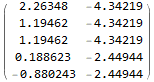

In [3]:
Rover1Data[[1;;5]] //  MatrixForm

-Graphics-
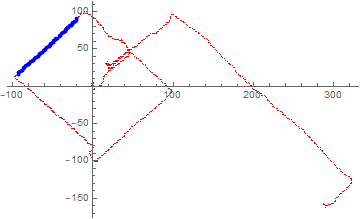

In [4]:
Show[ListPlot[Rover1Data, PlotStyle -> Red],
    ListPlot[Rover1Data[[320;;400]], PlotStyle -> Blue],
    PlotRange -> All]

In [5]:
Rover1LineInPark = Rover1Data[[320;;400]];

-19.7422   90.2954

-20.811    90.2954

-20.811    88.4026

-21.817    86.6212

-22.8858   86.6212
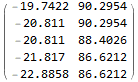

In [6]:
Rover1LineInPark[[1;;5]] // MatrixForm

# МНК

In [7]:
LSline = Fit[Rover1LineInPark, {x, 1}, x]

108.397 + 0.985918 x

-Graphics-
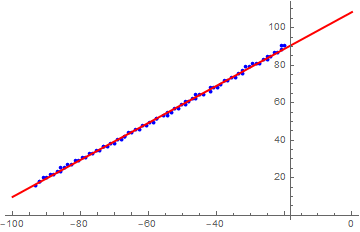

In [8]:
Show[ListPlot[Rover1Data[[320;;400]], PlotStyle -> Blue],
    Plot[LSline, {x, -100, 0}, PlotStyle -> {Thickness[0.007], Red}],
    PlotRange -> All]

# РНК

In [9]:
{u, s, v} = SingularValueDecomposition[Rover1LineInPark];

In [10]:
v // MatrixForm

-0.731967   0.68134

0.68134     0.731967

695.267   0.

0.        274.661

0.        0.
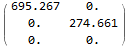

In [11]:
s[[1;;3]] // MatrixForm

In [12]:
a1 = - v[[2]][[1]] / v[[2]][[2]]

-0.930833

In [13]:
a2 = - Mean[Transpose[Rover1LineInPark][[1]]*a1 + Transpose[Rover1LineInPark][[2]]]

-105.302

-Graphics-
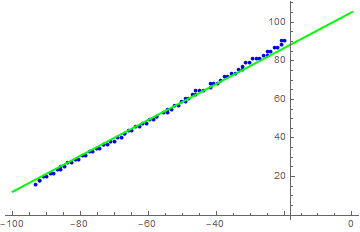

In [14]:
Show[ListPlot[Rover1Data[[320;;400]], PlotStyle -> Blue],
    Plot[- a2 - x*a1, {x, -100, 0}, PlotStyle -> {Thickness[0.007], Green}],
    PlotRange -> All]

# МНК и РНК

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>        AbsoluteThickness[1.6], Thickness[0.005], RGBColor[1, 0, 0]]}, 
 
>      {МНК, RGBColor[1, 0, 0]}, LegendMarkers -> None, LabelStyle -> {}, 
 
>      LegendLayout -> Column], After, Identity]], 
 
>   Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], Thickness[0.005], 
 
>       RGBColor[0, 1, 0]]}, {РНК, RGBColor[0, 1, 0]}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
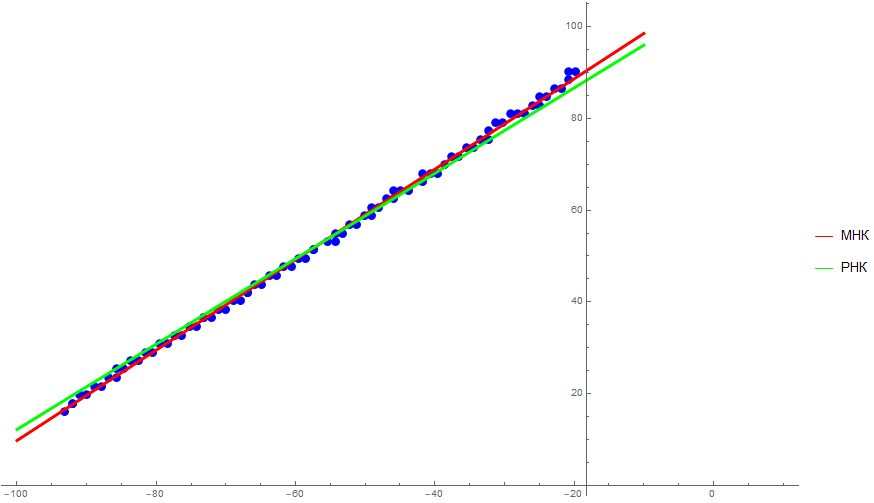

In [15]:
Show[ListPlot[Rover1Data[[320;;400]], PlotStyle -> Blue],
    Plot[LSline, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Red}, PlotLegends -> {"МНК", Red}],
    Plot[- a2 - x*a1, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Green}, PlotLegends -> {"РНК", Green}],
    PlotRange -> {{-100, 10}, {0, 100}}, ImageSize -> 800]

In [16]:
deltaAngle = - a1 - LSline[[2]][[1]]

-0.0550844

In [17]:
deltaAngleInForm = {Floor[deltaAngle*180/Pi],
                Floor[Mod[deltaAngle*180/Pi, 1]*60],
                Mod[Mod[deltaAngle*180/Pi, 1]*60, 1]*60}

{-4, 50, 38.0226}

# std МНК

In [18]:
inDistMHK = {}

{}

In [19]:
For[i = 1, i <= Dimensions[Rover1LineInPark][[1]], i++, 
            AppendTo[inDistMHK, {EuclideanDistance[Rover1LineInPark[[i]], 
            {Rover1LineInPark[[i]][[1]], LSline[[1]] + Rover1LineInPark[[i]][[1]]*LSline[[2]][[1]]}]}]]

In [20]:
Sqrt[Max[inDistMHK]]

1.55446

# std РНК

In [21]:
inDistPHK = {}

{}

In [22]:
For[i = 1, i <= Dimensions[Rover1LineInPark][[1]], i++, 
            AppendTo[inDistPHK, {EuclideanDistance[Rover1LineInPark[[i]], 
            {Rover1LineInPark[[i]][[1]], - a2 - Rover1LineInPark[[i]][[1]]*a1}]}]]

In [23]:
Sqrt[Max[inDistPHK]]

2.08926

# Задание 2.2/2.4

In [24]:
Rover1Data2 = Import["RV1-red3.txt", "Data"];

In [25]:
Rover1DataXH = Import["RV1-redxh.txt", "Data"];

In [26]:
Dimensions[Rover1Data2]

{1256, 3}

In [27]:
Dimensions[Rover1DataXH]

{1256, 2}

2.26348     -4.34219    207.

1.19462     -4.34219    207.

1.19462     -4.34219    207.

0.188623    -2.44944    207.

-0.880243   -2.44944    207.
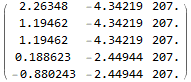

In [28]:
Rover1Data2[[1;;5]] //  MatrixForm

2.26348     207.

1.19462     207.

1.19462     207.

0.188623    207.

-0.880243   207.
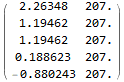

In [29]:
Rover1DataXH[[1;;5]] //  MatrixForm

-Graphics3D-
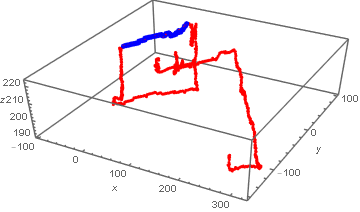

In [30]:
Show[ListPointPlot3D[Rover1Data2, PlotStyle -> Red, AxesLabel -> {x, y, z}],
    ListPointPlot3D[Rover1Data2[[315;;400]], PlotStyle -> Blue, AxesLabel -> {x, y, z}],
    PlotRange -> All, AspectRatio -> 1/GoldenRatio]

In [31]:
Rover1LineInPark3D = Rover1Data2[[320;;400]];

-19.7422   90.2954    212.

-20.811    90.2954    212.

-20.811    88.4026    212.

-21.817    86.6212    211.

-22.8858   86.6212    211.
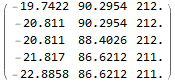

In [32]:
Rover1LineInPark3D[[1;;5]] // MatrixForm

-88.904    21.6005    210.

-89.9729   19.8191    210.

-90.9789   19.8192    210.

-92.0478   17.9264    210.

-92.0478   17.9264    210.

-93.1167   16.0337    210.
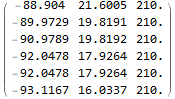

In [33]:
Rover1LineInPark3D[[76;;81]] // MatrixForm

In [34]:
Dimensions[Rover1LineInPark3D]

{81, 3}

In [35]:
Rover1LineInPark3DXH = Rover1DataXH[[320;;400]];

### МНК

In [36]:
LSline3D = Fit[Rover1LineInPark3D, {x, y, 1}, {x, y}]

250.048 + 0.362617 x - 0.351151 y

-Graphics3D-
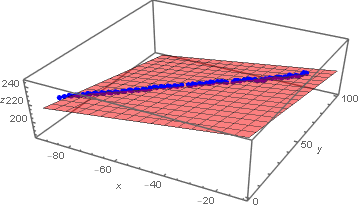

In [37]:
Show[ListPointPlot3D[Rover1Data2[[320;;400]], PlotStyle -> Blue, AxesLabel -> {x, y, z}],
    Plot3D[LSline3D, {x, -90, -10}, {y, 0, 100}, PlotStyle -> {Thickness[0.005], Red, Opacity[0.5]}],
    PlotRange -> All, AspectRatio -> 1/GoldenRatio]

### РНК

In [38]:
{u3d, s3d, v3d} = SingularValueDecomposition[Rover1LineInPark3D];

-0.250012    -0.711436    0.656774

0.2358       -0.702631    -0.671348

0.939091     -0.0129779   0.343423
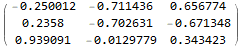

In [39]:
v3d // MatrixForm

2022.77   0.        0.

0.        274.889   0.

0.        0.        6.05597

0.        0.        0.
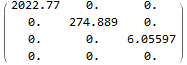

In [40]:
s3d[[1;;4]] // MatrixForm

In [41]:
a13D = - v3d[[1]][[3]] / v3d[[3]][[3]]

-1.91243

In [42]:
a23D = - v3d[[2]][[3]] / v3d[[3]][[3]]

1.95487

In [43]:
a33D = - Mean[Transpose[Rover1LineInPark3D][[1]]*a13D + Transpose[Rover1LineInPark3D][[2]]*a23D + Transpose[Rover1LineInPark3D][[3]]]

-422.126

In [44]:
- a23D*y - x*a13D - a33D

422.126 + 1.91243 x - 1.95487 y

-Graphics3D-
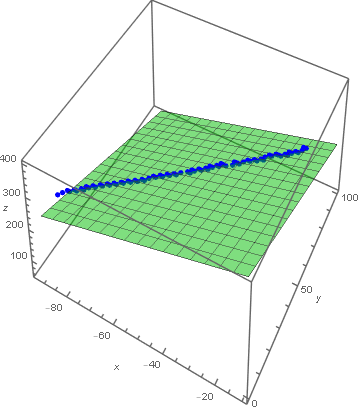

In [45]:
Show[ListPointPlot3D[Rover1Data2[[320;;400]], PlotStyle -> Blue, AxesLabel -> {x, y, z}],
    Plot3D[-a23D*y - x*a13D - a33D, {x, -90, -10}, {y, 0, 100}, PlotStyle -> {Thickness[0.005], Green, Opacity[0.5]}],
    PlotRange -> All, AspectRatio -> 2/GoldenRatio]

### МНК и РНК 

-Graphics3D-
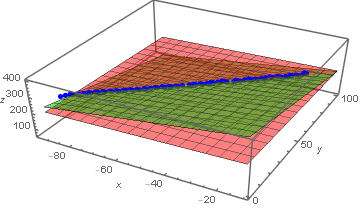

In [46]:
Show[ListPointPlot3D[Rover1Data2[[320;;400]], PlotStyle -> Blue, AxesLabel -> {x, y, z}],
    Plot3D[LSline3D, {x, -90, -10}, {y, 0, 100}, PlotStyle -> {Thickness[0.005], Red, Opacity[0.5]}],
    Plot3D[-a23D*y - x*a13D - a33D, {x, -90, -10}, {y, 0, 100}, PlotStyle -> {Thickness[0.005], Green, Opacity[0.5]}],
    PlotRange -> All, AspectRatio -> 1/GoldenRatio]

In [47]:
EuclideanDistance[Rover1LineInPark3D[[1]], Rover1LineInPark3D[[81]]]

104.416

### Delta H МНК

In [48]:
LSline3D

250.048 + 0.362617 x - 0.351151 y

In [49]:
p1MHK = LSline3D[[2]][[1]]*Rover1LineInPark3D[[1]][[1]] + LSline3D[[3]][[1]]*Rover1LineInPark3D[[1]][[2]] + LSline3D[[1]]

211.181

In [50]:
p2MHK = LSline3D[[2]][[1]]*Rover1LineInPark3D[[81]][[1]] + LSline3D[[2]][[1]]*Rover1LineInPark3D[[81]][[2]] + LSline3D[[1]]

222.096

In [51]:
deltaHMHK = p2MHK - p1MHK

10.9145

### Delta H РНК

In [52]:
-a23D*y - x*a13D - a33D

422.126 + 1.91243 x - 1.95487 y

In [53]:
p1PHK = -a23D*Rover1LineInPark3D[[1]][[2]] - Rover1LineInPark3D[[1]][[1]]*a13D - a33D

207.855

In [54]:
p2PHK = -a23D*Rover1LineInPark3D[[81]][[2]] - Rover1LineInPark3D[[81]][[1]]*a13D - a33D

212.703

In [55]:
deltaHPHK = p2PHK - p1PHK

4.84818

### График

In [56]:
-a23D*(- a2 - x*a1) - x*a13D - a33D

422.126 - 1.95487 (105.302 + 0.930833 x) + 1.91243 x

In [57]:
LSline3D[[1]] + LSline3D[[2]][[1]]*x + LSline3D[[3]][[1]]*(LSline[[1]] + LSline[[2]][[1]]*x)

250.048 - 0.351151 (108.397 + 0.985918 x) + 0.362617 x

In [58]:
at1 = LSline3D[[1]] + LSline3D[[3]][[1]]*LSline[[1]]

211.984

In [59]:
at1 = LSline3D[[2]][[1]] + LSline3D[[3]][[1]]*LSline[[2]][[1]]

0.0164118

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>        AbsoluteThickness[1.6], Thickness[0.005], RGBColor[1, 0, 0]]}, 
 
>      {МНК, RGBColor[1, 0, 0]}, LegendMarkers -> None, LabelStyle -> {}, 
 
>      LegendLayout -> Column], After, Identity]], 
 
>   Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], Thickness[0.005], 
 
>       RGBColor[0, 1, 0]]}, {РНК, RGBColor[0, 1, 0]}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
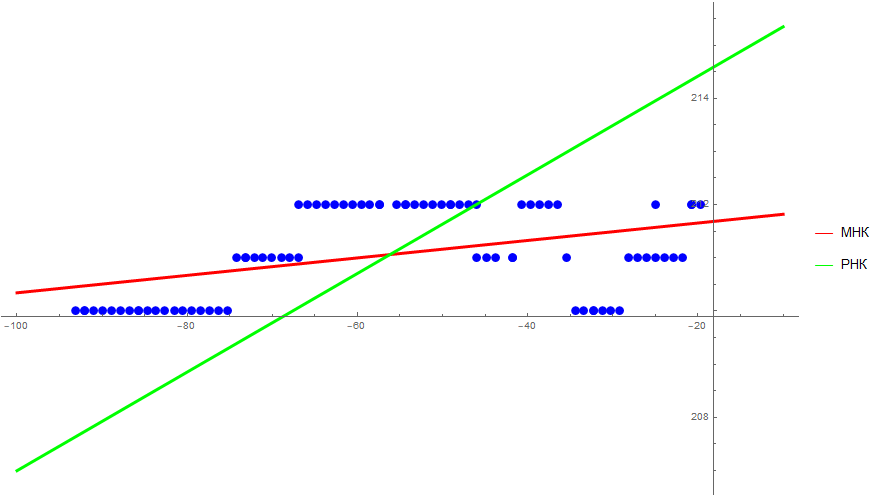

In [60]:
Show[ListPlot[Rover1DataXH[[320;;400]], PlotStyle -> Blue],
     Plot[211.984 + 0.0164118*x, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Red}, PlotLegends -> {"МНК", Red}],
     Plot[-a23D*(-a2 - x*a1) - x*a13D - a33D, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Green}, PlotLegends -> {"РНК", Green}],
    PlotRange -> All, ImageSize -> 800]

##### Угол наклона по МНК

In [61]:
at1

0.0164118

In [62]:
deltaAngleInFormHMHK = {Floor[at1*180/Pi],
                Floor[Mod[at1*180/Pi, 1]*60],
                Mod[Mod[at1*180/Pi, 1]*60, 1]*60}

{0, 56, 25.1684}

##### Угол наклона по РНК

In [63]:
ar1 = a23D*a1-a13D

0.0927735

In [64]:
deltaAngleInFormHPHK = {Floor[ar1*180/Pi],
                Floor[Mod[ar1*180/Pi, 1]*60],
                Mod[Mod[ar1*180/Pi, 1]*60, 1]*60}

{5, 18, 55.9073}